# (Ford GoBike System Exploration)
## by (Salma Hesham Salah Abdelhalim)

## Preliminary Wrangling

> This dataset includes information about rides made in nike-sharing system in San Fransisco.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df.shape

(183412, 16)

### What is the structure of your dataset?

> (183412, 16)

### What is/are the main feature(s) of interest in your dataset?

> bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, user_type, member_birth_year, member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
## Checking any null values 
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Since we have a large amount of data in our dataset, we will remove rows with null values.

In [7]:
## Dropping null values
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [8]:
## Making sure that it includes only yes or no 
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
## Seeing if there is any unusual type
df.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

Gender type 'Other' is not clear.

In [10]:
## Seeing how much other contribute in the dataset
df.query('member_gender == "Other"').member_gender.shape[0]

3647

Since it exists in only 3647 columns, it can be removed for simplicity.

In [11]:
## Removing other since it provides unclear information
df.member_gender = df.query('member_gender != "Other"').member_gender

In [12]:
## Making sure the rowa are removed
df.query('member_gender == "Other"').member_gender.shape[0]

0

In [13]:
## Making sure that all years are realistic
df.member_birth_year.unique()

array([1984., 1972., 1989., 1974., 1959., 1983., 1988., 1992., 1996.,
       1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986., 2000.,
       1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967., 1998.,
       1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964., 1965.,
       1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970., 1956.,
       1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950., 1949.,
       1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920., 1933.,
       2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930., 1902.,
       1910., 1938., 1927.])

There are alot of outlier years that make no sense, so they will be removed as people born on these years should be too old to ride bikes or even have already passed away.

In [14]:
df.member_birth_year = df.query('member_birth_year >= 1931').member_birth_year

In [15]:
## The previous cleaning created some null values so, we removed them
df.dropna(inplace = True)

In [16]:
df.member_birth_year.unique()

array([1984., 1972., 1974., 1959., 1983., 1989., 1992., 1996., 1993.,
       1990., 1988., 1981., 1975., 1978., 1991., 1997., 1986., 2000.,
       1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967., 1998.,
       1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964., 1965.,
       1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970., 1956.,
       1957., 1945., 1952., 1948., 1951., 1941., 1950., 1949., 1953.,
       1955., 1946., 1947., 1931., 1943., 1942., 1933., 2001., 1944.,
       1934., 1939., 1938.])

The column 'member_birth_year' is of type float for no apparent reason. So, it is better to turn it to type int.

In [17]:
## Changing year data type to int
df.member_birth_year = df.member_birth_year.astype('int64', copy=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171230 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               171230 non-null int64
start_time                 171230 non-null object
end_time                   171230 non-null object
start_station_id           171230 non-null float64
start_station_name         171230 non-null object
start_station_latitude     171230 non-null float64
start_station_longitude    171230 non-null float64
end_station_id             171230 non-null float64
end_station_name           171230 non-null object
end_station_latitude       171230 non-null float64
end_station_longitude      171230 non-null float64
bike_id                    171230 non-null int64
user_type                  171230 non-null object
member_birth_year          171230 non-null int64
member_gender              171230 non-null object
bike_share_for_all_trip    171230 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 22.2+ MB


## Now we will investigate some parameters from our dataset:

### We will investigate the 'user_type' parameter to see the contribotion of each type .

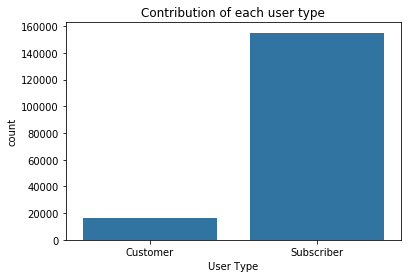

In [19]:
sb.countplot(data=df, x='user_type', color=sb.color_palette()[0]);
plt.title('Contribution of each user type');
plt.xlabel('User Type');

The number of subscribers is larger than the number of customers.

### Now, we will see how likely it is that the people share bikes till the end of the trip.

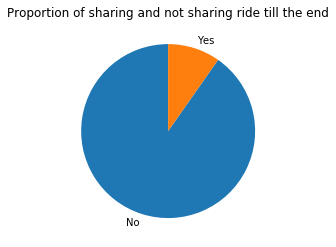

In [20]:
bike_share = df.bike_share_for_all_trip.value_counts()
plt.pie(bike_share, labels=bike_share.index, startangle=90);
plt.title('Proportion of sharing and not sharing ride till the end');

Most people don't share bikes till the end of the trips.

### Here, we will the presence of each gender in our dataset.

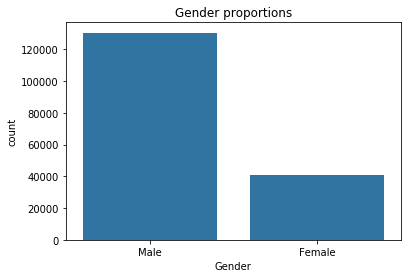

In [21]:
sb.countplot(data=df, x='member_gender', color=sb.color_palette()[0]);
plt.title('Gender proportions');
plt.xlabel('Gender');

There are a lot more males than females.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It is clear that the number of subscibers is alot more than customers.
<br>
Most people don't share bikes till the end of the trip.
</br>
<br>
The number of males was higher than the number of females.
</br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The 'Other' gender in column 'member_gender' is removed since it doesn't provide any information.
<br>
The data type of column 'member_birth_year' is changed from float to int.
</br>
<br>
Some outlier values are removed from column 'member_birth_year'.
</br>
<br>
All rows with null values are removed.
</br>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## In this section, we will investigate relationships between pairs in our data:

### We will see how likely each gender will share a bike trip till the end.

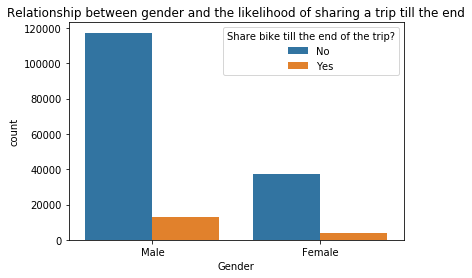

In [22]:
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip');
plt.title('Relationship between gender and the likelihood of sharing a trip till the end');
plt.xlabel('Gender');
plt.legend(title='Share bike till the end of the trip?');

This chart shows that both males and females tend to not share a trip till the end. The high no bar for males is because the number of males is larger than females, but does not necessarily mean that the proportion of males who don't share a trip till the end is higher that the proportion of females.

In [23]:
female = df.query('member_gender == "Female"')
prob_female_yes = female.query('bike_share_for_all_trip == "Yes"').shape[0] / female.shape[0]

male = df.query('member_gender == "Male"')
prob_male_yes = male.query('bike_share_for_all_trip == "Yes"').shape[0] / male.shape[0]

prob_female_yes, prob_male_yes

(0.08810767080973744, 0.10025375846180974)

The calculations above show both males and females have close probabilities of saying yes and that the difference in the length of the bars is due to the higher contribution of males in the dataset.

### We will see now if the relationship between duration of the trip and the likelihood of bike sharing for the whole trip.

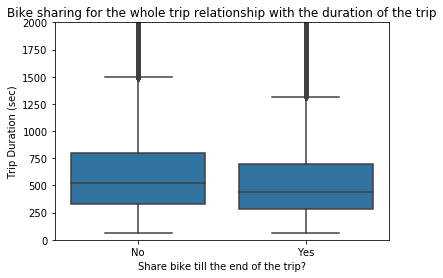

In [24]:
sb.boxplot(data=df, x='bike_share_for_all_trip', y='duration_sec', color=sb.color_palette()[0]);
plt.title('Bike sharing for the whole trip relationship with the duration of the trip');
plt.xlabel('Share bike till the end of the trip?');
plt.ylabel('Trip Duration (sec)');
plt.ylim(0, 2000);

We observe here that the duration doesn't really affect the variable of sharing the whole trip or not as the two plots are quite similar with the probability of no being higher. Here, we had to zoom in to the durations less than 2000 seconds tobetter observe the plot.

### We will see here if the year of birth affects the bike sharing for the whole trip decision.

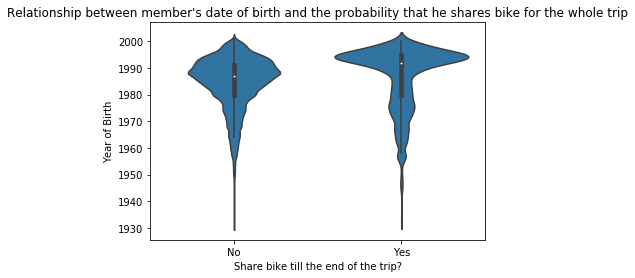

In [25]:
sb.violinplot(data=df, x='bike_share_for_all_trip', y='member_birth_year', color=sb.color_palette()[0]);
plt.title("Relationship between member's date of birth and the probability that he shares bike for the whole trip");
plt.xlabel('Share bike till the end of the trip?');
plt.ylabel('Year of Birth');

The median of the yes plot is higher than the no plot. The number of people sharing the whole trip is the largest in years between 1990 and 2001, while the number people who don't share the whole trip is the largest in years between 1985 and 1990.

### We will take a look at the relationship between the gender and the duration of the trip.

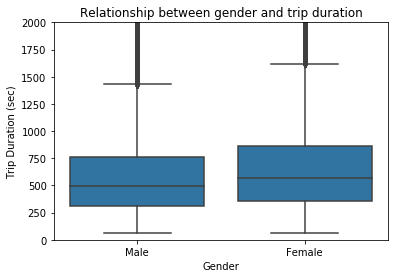

In [26]:
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=sb.color_palette()[0]);
plt.title('Relationship between gender and trip duration');
plt.xlabel('Gender');
plt.ylabel('Trip Duration (sec)');
plt.ylim(0, 2000);

Females tend to take longer trips than males.

### Below, we will see the relationship between the user type and gender.

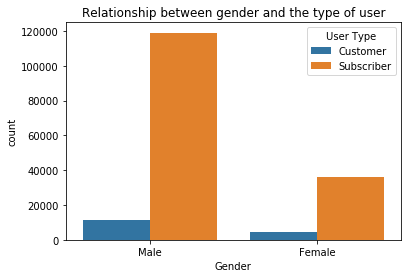

In [27]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');
plt.title('Relationship between gender and the type of user');
plt.xlabel('Gender');
plt.legend(title='User Type');

The number of subscribers is higher than the number of customers in both males and females.

In [28]:
female = df.query('member_gender == "Female"')
prob_female_subs = female.query('user_type == "Subscriber"').shape[0] / female.shape[0]

male = df.query('member_gender == "Male"')
prob_male_subs = male.query('user_type == "Subscriber"').shape[0] / male.shape[0]

prob_female_subs, prob_male_subs

(0.8866906915741217, 0.9119205145700289)

The peobabilities above show that both females and males have higher probabilities to be subscribers with males having a slightly higher probability than females.

### Relation between age, represented by the year of birth, and trip duration

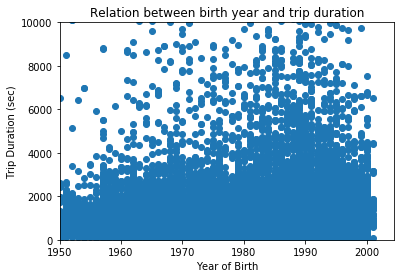

In [29]:
plt.scatter(data=df, x='member_birth_year', y='duration_sec');
plt.xlabel('Year of Birth');
plt.xlim(1950);
plt.ylabel('Trip Duration (sec)');
plt.ylim(0, 10000);
plt.title('Relation between birth year and trip duration');

More people contribute are year of birth increases and they a little longer trip durations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> <br>Both males and females have higher tendency of not sharing the bike for the whole trip.</br>
<br>People tend to share bikes for the whole trips as the duration of the trip is small, as the duration increases, they tend to not share for the whole trip.</br>
<br>The majority of people shring the bike for the whole trip are born between years 1990 and 2000, while the majority of people not sharing the bike for the whole trip are born between years 1985 and 1990.</br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> <br>Females have longer ride durations than males.</br>
<br>Both females and males are subscribers.</br>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## We will see here relatioships between three variables:

### We will investigate the relationship between the duration of trip, gender, and the likelihood that people share bikes till the end of the trip.

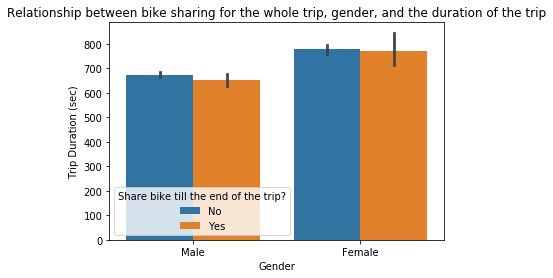

In [30]:
sb.barplot(data=df, x='member_gender', y='duration_sec', hue='bike_share_for_all_trip');
plt.title('Relationship between bike sharing for the whole trip, gender, and the duration of the trip');
plt.ylabel('Trip Duration (sec)');
plt.xlabel('Gender');
plt.legend(title='Share bike till the end of the trip?', loc='best');

Females tend to take longer trips than males. The duration doesn't affect the bike sharing for the whole trip paremeter in females. Males tend to have shorter trip durations are are slightly more likely to not share bike till the end of the trip as the duration gets longer.

### We will see now the relation between the duration of the trip, the age of the member resembeled in the birth year, and the possibility that a trip is hared till the end.

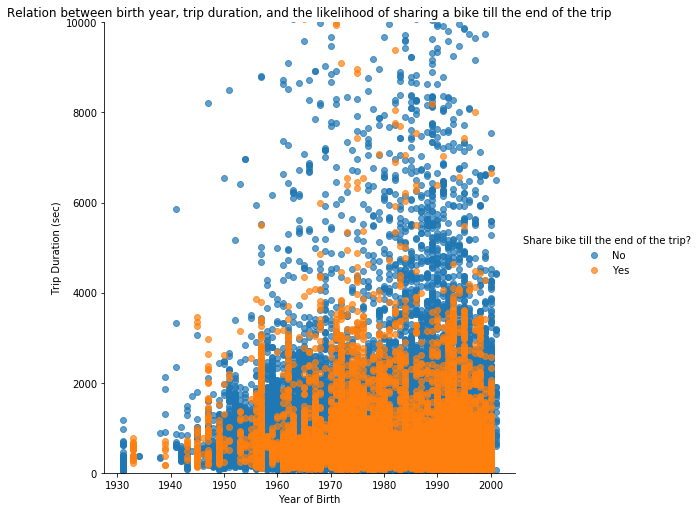

In [31]:
p = sb.FacetGrid(data=df, hue='bike_share_for_all_trip', height=7);
p.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha=0.7);
plt.ylim(0, 10000);
p.set_axis_labels('Year of Birth', 'Trip Duration (sec)');
p.add_legend(title='Share bike till the end of the trip?');
plt.title('Relation between birth year, trip duration, and the likelihood of sharing a bike till the end of the trip');

The contribution of younger people is larger. As the trip duration increases, people tend to not share a bike till the end of the trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The duration of the trip seem to contribute in the bike sharing till the end of the trip variable.
<br>people of different ages contribute in the data.</br>

### Were there any interesting or surprising interactions between features?

> Females go for longer rides than males and have close probabilities of sharing and not sharing a bike till the end regardless of the trip duration.
<br>Males tend slightly to not share a bike till the end of the trip when the duration of the trip is linger. They also go for slightly shorter duration trips than females</br>
<br>It is clear that there is a tendency of not sharing a ride till the end. This tendency increases as the duration increases. Also, as the birth year increases, we observe some points with high trip durations, and more people tend to not share bikes till the end.</br>

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!